# Import Packages and Load Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.metrics import SCORERS
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
linreg = LinearRegression()

In [2]:
#import data and info, describe
kc = pd.read_csv('kc_house_data.csv')
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### sqft_basement and date are object variables. Need to check sqft_basement

### Waterfront has a lot of missing data. Consider to put them in the model? Drop NA rows? Imputation? 


In [82]:
# check sqft_basement
# contain "?" ,so the columns is object
kc['sqft_basement'].value_counts().head() 

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

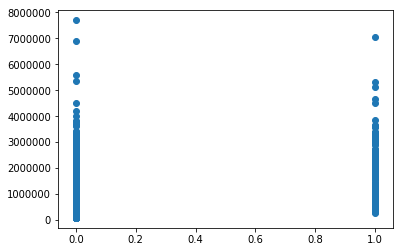

In [83]:
# check waterfront vs price 
# do not see strong difference in price related to 2 group categorized by waterfront column. 

plt.scatter(kc[['waterfront']],kc[['price']])

In [119]:
# check yr_renovated vs price
#plt.scatter(kc[['yr_renovated']],kc[['price']])
kc[kc['yr_renovated'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697,5
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386,5
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573,6
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,0.0,0.0,...,790,730.0,1948,NaN,98115,47.6950,-122.304,1520,6235,6
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,0.0,...,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669,7
45,8035350320,7/18/2014,488000.0,3,2.50,3160,13603,2.0,0.0,0.0,...,3160,0.0,2003,NaN,98019,47.7443,-121.977,3050,9232,7
52,7518505990,12/31/2014,600000.0,3,1.75,1410,4080,1.0,0.0,0.0,...,1000,410.0,1950,NaN,98117,47.6808,-122.384,1410,4080,12
56,9478500640,8/19/2014,292500.0,4,2.50,2250,4495,2.0,0.0,0.0,...,2250,0.0,2008,NaN,98042,47.3663,-122.114,2250,4500,8
58,7922800400,8/27/2014,951000.0,5,3.25,3250,14342,2.0,0.0,4.0,...,3250,0.0,1968,NaN,98008,47.5880,-122.116,2960,11044,8


In [89]:
#change date to month:
kc['month'] = kc['date'].map(lambda x: x[:2].replace("/",""))
kc_transform = kc.drop(['date','id'],axis=1)

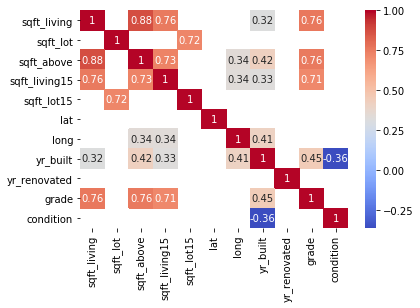

In [90]:
# check correlation matrix among numeric variables
numeric_col = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','lat','long','yr_built','yr_renovated','grade','condition','month']
mask = kc_transform[numeric_col].corr().apply(lambda x :np.abs(x)<0.3) 
sns.heatmap(kc_transform[numeric_col].corr(),annot=True,mask = mask,cmap='coolwarm' )

In [91]:
# We can see that although yr_built, condition and longtitude have some correlation with other predictors,
# these relationships are not strong. Thus, we only perform the standardize technique to the variables that has 
# at least 1 correlation > 0.5 or < -0.5 
std_col = ['sqft_living', 'sqft_lot','sqft_above','sqft_living15','sqft_lot15','grade']
ss = StandardScaler()
for i in std_col:
    name = i +'_std'
    kc_transform[name] = ss.fit_transform(kc_transform[[i]].values)
    kc_transform = kc_transform.drop([i],axis=1)


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/util

In [92]:
kc_transform.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'month', 'sqft_living_std', 'sqft_lot_std',
       'sqft_above_std', 'sqft_living15_std', 'sqft_lot15_std', 'grade_std'],
      dtype='object')

# Delete waterfront , yr_renovated

In [120]:
# we will delete out rows contains "?", and convert sqft_basement to numeric
kc_transform = kc_transform.drop(['waterfront','yr_renovated'],axis=1)
kc_transform = kc_transform[kc_transform['sqft_basement']!= '?']
kc_transform['sqft_basement'] = kc_transform['sqft_basement'].map(lambda x: np.float(x))
kc_transform = kc_transform.dropna()
len(kc)-len(kc_transform)

515

In [121]:
# convert zipcode, bedrooms, bathrooms,floors to catergorical and get dummies variables 
for i in ['bathrooms','bedrooms','floors','zipcode']:
    kc_transform[i] = kc_transform[i].map(lambda x: str(x))
kc_transform = pd.get_dummies(kc_transform)
kc_transform.columns

Index(['price', 'view', 'condition', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living_std', 'sqft_lot_std', 'sqft_above_std',
       ...
       'month_11', 'month_12', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9'],
      dtype='object', length=142)

In [131]:
# train_test split 
kc_transform['const'] = 1
train_set, test_set = train_test_split(kc_transform,test_size=0.25,random_state=42)

In [140]:
len(kc_transform.drop(['price'],axis=1).columns)

142

In [196]:
X_train = train_set.drop(['price'],axis=1)
#X_train = X_train[['view','sqft_living_std','condition','const']]
predictors = np.asarray(X_train)
model = sm.OLS(train_set['price'], predictors).fit()
model.summary(xname=list(X_train.columns.values),alpha=0.05)
#model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     506.1
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        00:31:28   Log-Likelihood:            -2.1185e+05
No. Observations:               15811   AIC:                         4.240e+05
Df Residuals:                   15677   BIC:                         4.250e+05
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
view                8.68e+04   1932.765     44.910      0.000     8.3e+04    9.06e+04
condition          2.707e+04   2230.110     12.137      0.000    2.27e+04    3.14e+04
sqft_basement     -3799.4477    928.503     -4.092      0.000   -5619.420   -1979.475
yr_built           -554.8020     77.884     -7.123      0.000    -707.464    -402.140
lat                1.904e+05   7.36e+04      2.588      0.010    4.62e+04    3.35e+05
long              -1.793e+05   5.15e+04     -3.481      0.001    -2.8e+05   -7.83e+04
sqft_living_std    3.602e+06   8.52e+05      4.225      0.000    1.93e+06    5.27e+06
sqft_lot_std       9185.1542   1888.290      4.864      0.000    5483.889    1.29e+04
sqft_above_std    -3.096e+06   7.69e+05     -4.028      0.000    -4.6e+06   -1.59e+06
sqft_living15_std  9445.0479   2352.991      4.014      0.000    4832.915    1.41e+04
sqft_lot15_std    -5250.9905   1952.604     -2.689      0.007   -9078.320   -1423.661
grade_std          7.094e+04   2518.861     28.165      0.000     6.6e+04    7.59e+04
bedrooms_1        -1.695e+06   4.42e+05     -3.833      0.000   -2.56e+06   -8.28e+05
bedrooms_10       -1.926e+06   4.56e+05     -4.227      0.000   -2.82e+06   -1.03e+06
bedrooms_11       -1.798e+06   4.67e+05     -3.852      0.000   -2.71e+06   -8.83e+05
bedrooms_2        -1.721e+06   4.42e+05     -3.891      0.000   -2.59e+06   -8.54e+05
bedrooms_3        -1.731e+06   4.42e+05     -3.913      0.000    -2.6e+06   -8.64e+05
bedrooms_33       -1.976e-07   3.89e-08     -5.075      0.000   -2.74e-07   -1.21e-07
bedrooms_4        -1.756e+06   4.42e+05     -3.970      0.000   -2.62e+06   -8.89e+05
bedrooms_5        -1.775e+06   4.42e+05     -4.011      0.000   -2.64e+06   -9.07e+05
bedrooms_6        -1.842e+06   4.42e+05     -4.164      0.000   -2.71e+06   -9.75e+05
bedrooms_7        -1.975e+06   4.43e+05     -4.454      0.000   -2.84e+06   -1.11e+06
bedrooms_8        -1.743e+06   4.45e+05     -3.916      0.000   -2.61e+06    -8.7e+05
bedrooms_9        -2.159e+06   4.51e+05     -4.787      0.000   -3.04e+06   -1.27e+06
bathrooms_0.5     -1.117e+06   1.96e+05     -5.694      0.000    -1.5e+06   -7.32e+05
bathrooms_0.75    -1.053e+06   1.75e+05     -6.016      0.000    -1.4e+06    -7.1e+05
bathrooms_1.0     -1.114e+06   1.74e+05     -6.386      0.000   -1.46e+06   -7.72e+05
bathrooms_1.25    -1.269e+06   1.86e+05     -6.836      0.000   -1.63e+06   -9.05e+05
bathrooms_1.5      -1.14e+06   1.74e+05     -6.536      0.000   -1.48e+06   -7.98e+05
bathrooms_1.75    -1.146e+06   1.74e+05     -6.572      0.000   -1.49e+06   -8.04e+05
bathrooms_2.0     -1.142e+06   1.74e+05     -6.546      0.000   -1.48e+06      -8e+05
bathrooms_2.25    -1.139e+06   1.74e+05     -6.527      0.000   -1.48e+06   -7.97e+05
bathrooms_2.5     -1.147e+06   1.74e+05     -6.577      0.000   -1.49e+06

In [165]:
X_train.columns[model.pvalues>0.05]

Index(['bathrooms_5.5', 'bathrooms_6.25', 'zipcode_98033', 'zipcode_98040',
       'zipcode_98102', 'zipcode_98105', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98119'],
      dtype='object')

In [171]:
X_train_1 = X_train[X_train.columns[model.pvalues<0.05]]
X_train_1.head()
predictors_1 = np.asarray(X_train_1)
model_1 = sm.OLS(train_set['price'], predictors_1).fit()
model_1.summary(xname=list(X_train_1.columns.values))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     524.4
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        00:18:22   Log-Likelihood:            -2.1197e+05
No. Observations:               15811   AIC:                         4.242e+05
Df Residuals:                   15684   BIC:                         4.252e+05
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
view               8.471e+04   1940.931     43.643      0.000    8.09e+04    8.85e+04
condition           2.62e+04   2238.091     11.707      0.000    2.18e+04    3.06e+04
sqft_basement     -4438.7973    830.180     -5.347      0.000   -6066.047   -2811.548
yr_built           -703.6568     76.885     -9.152      0.000    -854.360    -552.954
lat               -1.607e+05   6.22e+04     -2.584      0.010   -2.83e+05   -3.88e+04
long              -3.552e+05   4.34e+04     -8.189      0.000    -4.4e+05    -2.7e+05
sqft_living_std    4.191e+06   7.62e+05      5.499      0.000     2.7e+06    5.68e+06
sqft_lot_std       8994.8381   1902.100      4.729      0.000    5266.502    1.27e+04
sqft_above_std    -3.629e+06   6.87e+05     -5.283      0.000   -4.98e+06   -2.28e+06
sqft_living15_std  1.061e+04   2356.727      4.501      0.000    5988.154    1.52e+04
sqft_lot15_std    -5216.2394   1966.515     -2.653      0.008   -9070.835   -1361.644
grade_std          7.362e+04   2525.772     29.148      0.000    6.87e+04    7.86e+04
bedrooms_1        -1.996e+06   3.95e+05     -5.048      0.000   -2.77e+06   -1.22e+06
bedrooms_10        -2.25e+06   4.11e+05     -5.481      0.000   -3.05e+06   -1.45e+06
bedrooms_11       -2.104e+06   4.22e+05     -4.985      0.000   -2.93e+06   -1.28e+06
bedrooms_2        -2.022e+06   3.96e+05     -5.112      0.000    -2.8e+06   -1.25e+06
bedrooms_3        -2.034e+06   3.95e+05     -5.144      0.000   -2.81e+06   -1.26e+06
bedrooms_33       -4.384e-07   8.28e-08     -5.298      0.000   -6.01e-07   -2.76e-07
bedrooms_4         -2.06e+06   3.95e+05     -5.210      0.000   -2.84e+06   -1.29e+06
bedrooms_5        -2.079e+06   3.95e+05     -5.257      0.000   -2.85e+06    -1.3e+06
bedrooms_6        -2.148e+06   3.96e+05     -5.428      0.000   -2.92e+06   -1.37e+06
bedrooms_7        -2.282e+06   3.96e+05     -5.756      0.000   -3.06e+06    -1.5e+06
bedrooms_8        -2.028e+06   3.99e+05     -5.084      0.000   -2.81e+06   -1.25e+06
bedrooms_9        -2.482e+06   4.06e+05     -6.118      0.000   -3.28e+06   -1.69e+06
bathrooms_0.5     -9.406e+05   1.13e+05     -8.336      0.000   -1.16e+06   -7.19e+05
bathrooms_0.75     -8.72e+05   6.69e+04    -13.031      0.000      -1e+06   -7.41e+05
bathrooms_1.0     -9.374e+05   6.31e+04    -14.850      0.000   -1.06e+06   -8.14e+05
bathrooms_1.25    -1.046e+06   9.12e+04    -11.467      0.000   -1.22e+06   -8.67e+05
bathrooms_1.5     -9.624e+05    6.3e+04    -15.269      0.000   -1.09e+06   -8.39e+05
bathrooms_1.75    -9.689e+05   6.29e+04    -15.411      0.000   -1.09e+06   -8.46e+05
bathrooms_2.0     -9.644e+05   6.29e+04    -15.334      0.000   -1.09e+06   -8.41e+05
bathrooms_2.25      -9.6e+05   6.27e+04    -15.299      0.000   -1.08e+06   -8.37e+05
bathrooms_2.5     -9.701e+05   6.26e+04    -15.508      0.000   -1.09e+06

In [229]:
np.abs(model_1.params).sort_values(ascending=False)

x132     2.348527e+07
x7       4.190907e+06
x55      3.987791e+06
x53      3.954671e+06
x52      3.937615e+06
x51      3.933852e+06
x54      3.840466e+06
x56      3.830879e+06
x9       3.628708e+06
x49      2.525666e+06
x23      2.482488e+06
x21      2.281519e+06
x14      2.250134e+06
x20      2.147891e+06
x15      2.104344e+06
x19      2.078571e+06
x18      2.060242e+06
x17      2.034370e+06
x22      2.027715e+06
x16      2.022261e+06
x13      1.995739e+06
x131     1.968886e+06
x130     1.966074e+06
x122     1.965909e+06
x121     1.965167e+06
x129     1.964708e+06
x120     1.962865e+06
x123     1.961039e+06
x128     1.957456e+06
x127     1.957440e+06
             ...     
x82      2.159009e+05
x109     2.154606e+05
x67      2.048720e+05
x93      2.042454e+05
x71      2.004145e+05
x92      1.992578e+05
x102     1.902826e+05
x62      1.852065e+05
x74      1.661849e+05
x84      1.650851e+05
x63      1.645575e+05
x98      1.624495e+05
x96      1.622497e+05
x83      1.622028e+05
x5       1

In [ ]:
model_1.params

In [172]:
# checking cross validation
X = X_train_1
y = train_set['price']
k_fold_model = KFold(n_splits=10,shuffle=True)
0-np.mean(cross_val_score(linreg, X,  y, cv=k_fold_model, scoring="neg_mean_absolute_error"))

96145.42103499321

In [174]:
X_test_1 = test_set[list(X_train.columns.values)]
test_predictors_1 = np.asarray(X_test_1)
test_predictors_int_1= sm.add_constant(test_predictors_1)
predictions_1=model.predict(test_predictors_int_1)
y_test = test_set['price']

In [182]:
error = y_test-predictions_1
np.mean(np.abs(error))

97124.3735606334

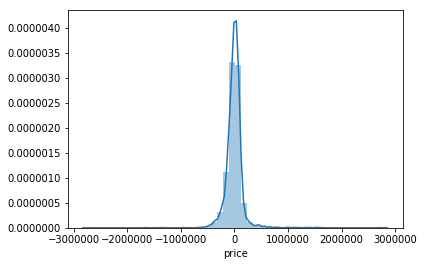

In [183]:
sns.distplot(error)

In [184]:
stats.shapiro(error)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.7105476260185242, 0.0)

## forward selection

In [222]:
name = list(X_train.columns.values)
model.names[np.abs(model_1.params).sort_values(ascending=False).index]

AttributeError: 'OLSResults' object has no attribute 'names'

In [215]:
X_train.columns[np.abs(model_1.params).sort_values(ascending=False).index.values]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [224]:
model.